# Loan_Approval

### Data Retrieving

importing The data Using Pandas and Displaying the resulting Dataframe.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("lending_data.csv")
print(df.head())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  


## Get dataset summary & numerical statistics

In [22]:
print(df.info()) 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None
          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700


## Shows missing values per column
     . If there is a missing numeric and Catagorical values Replace with  mean and moad respectivelly.

In [4]:
df.fillna(df.mean(), inplace=True)  
df.fillna(df.mode().iloc[0], inplace=True)
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


# Data Preproccessing (Encoding & Scaling)
     . Since all columns in the dataset are numerical, we don't need categorical encoding. However, feature scaling is required.

In [6]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['loan_size', 'interest_rate', 'borrower_income', 
                  'debt_to_income', 'num_of_accounts', 'derogatory_marks', 
                  'total_debt']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0   0.427304       0.426837         0.427404        0.668571         0.616143   
1  -0.671487      -0.674918        -0.671552       -0.802166        -0.434049   
2  -0.384846      -0.370249        -0.372922       -0.344424        -0.434049   
3   0.427304       0.417844         0.415459        0.655346         0.616143   
4   0.475078       0.456068         0.451295        0.694873         0.616143   

   derogatory_marks  total_debt  loan_status  
0          1.043996    0.427404            0  
1         -0.673973   -0.671552            0  
2         -0.673973   -0.372922            0  
3          1.043996    0.415459            0  
4          1.043996    0.451295            0  


##  Feature Selection & Splitting Data
         . Prepares data for training by splitting it into training and test sets.

In [8]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target variable (0 = Not Approved, 1 = Approved)

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (62028, 7)
Testing Data Shape: (15508, 7)


# Predict Model Performance
     . I predict that the Random Forest Classifier will outperform Logistic Regression. The reason behind my prediction is that Random Forests can determine feature importance by analyzing how often each feature is selected across multiple decision trees. This ability allows the model to handle complex relationships between variables, which I believe will contribute to better overall performance compared to Logistic Regression, which assumes a linear relationship between features. later compare it with the actual model results.

# Train Machine Learning Models
      

   * Logistic Regression Model 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred_log = classifier.predict(X_test)

# Evaluate the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_log))


Training Data Score: 0.9939865867027794
Testing Data Score: 0.994712406499871
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15011
           1       0.87      0.98      0.92       497

    accuracy                           0.99     15508
   macro avg       0.94      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



    * Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier model
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = clf.predict(X_test_scaled)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_rf))


Training Score: 0.9970658412329916
Testing Score: 0.9927779210729946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15011
           1       0.87      0.91      0.89       497

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



 #### The Logistic Regression model had a score of 0.9947 and the Random Forest Classifier model had a score of 0.9927. Therefore, my prediction was incorrect, although only by a slim amount; the difference in scores is only around 0.002. It seems for this dataset, both models are very accurate in predicting the risk level of given loans.

#  Evaluate Model Performance

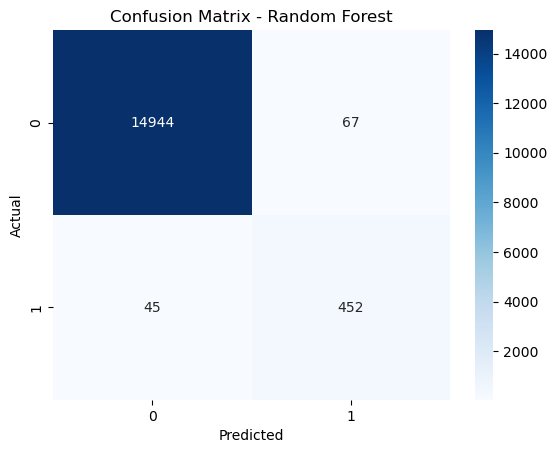

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


True Negatives (TN) = 14944 (Correctly predicted 0 as 0)

False Positives (FP) = 67 (Incorrectly predicted 1 as 0)

False Negatives (FN) = 53 (Incorrectly predicted 0 as 1)

True Positives (TP) = 444(Correctly predicted 1 as 1)

# Saving The Trainned Model

In [52]:
import joblib

# Save the trained Random Forest model
joblib.dump(clf, "random_forest_model_ML.pkl")



['random_forest_model_ML.pkl']

## Approval Probability

In [32]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load the trained model (if not already in memory)
clf = joblib.load("random_forest_model.pkl")

# Example input data (ensure all features in X_train are included)
input_data = pd.DataFrame([[
    4000.0,   # loan_size
    3.5,       # interest_rate
    150000.0,  # borrower_income
    0.10,      # debt_to_income
    8,         # num_of_accounts
    0,         # derogatory_marks
    2000.0     # total_debt
]], columns=[
    'loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 
    'derogatory_marks', 'total_debt'
])

# Ensure input_data columns are aligned with X_train's columns
input_data = input_data[X_train.columns]  # Reorder the input data columns to match X_train

# Check if any columns are missing from input_data that are present in X_train
missing_columns = [col for col in X_train.columns if col not in input_data.columns]
if missing_columns:
    print(f"Missing columns in input data: {missing_columns}")
else:
    print("All columns are present.")

# Scale the input data using the same scaler applied to training data
scaler = StandardScaler().fit(X_train)  # Fit the scaler on training data if not already done
input_data_scaled = scaler.transform(input_data)

# Predict the probability for loan approval
prob = clf.predict_proba(input_data_scaled)
print("Approval Probability:", prob[0][1])  # Probability of loan approval (class 1)


All columns are present.
Approval Probability: 0.37204545454545457


## Importance features for Approval 

In [36]:
# Assuming clf is your RandomForest model
importances = clf.feature_importances_  # Use clf, not rf_model
feature_names = X.columns

# Get the feature importance sorted in descending order
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Display the sorted feature importances
for importance, name in sorted_importances:
    print(f"{name}: {importance}")


interest_rate: 0.30599756577149506
total_debt: 0.18599749869133853
borrower_income: 0.16645066831737548
debt_to_income: 0.15275152964989777
loan_size: 0.12308291634331414
num_of_accounts: 0.0656227650161675
derogatory_marks: 9.705621041145778e-05


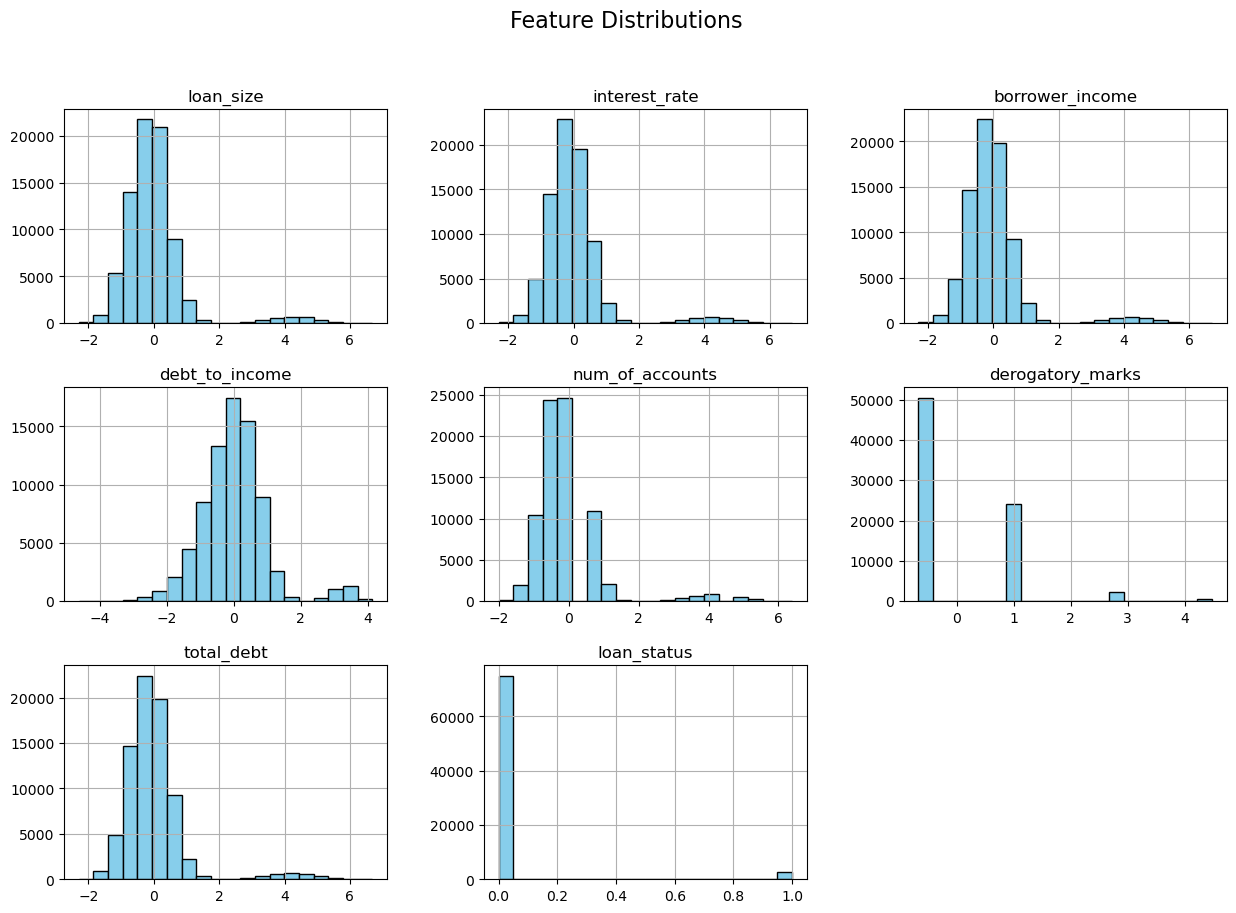

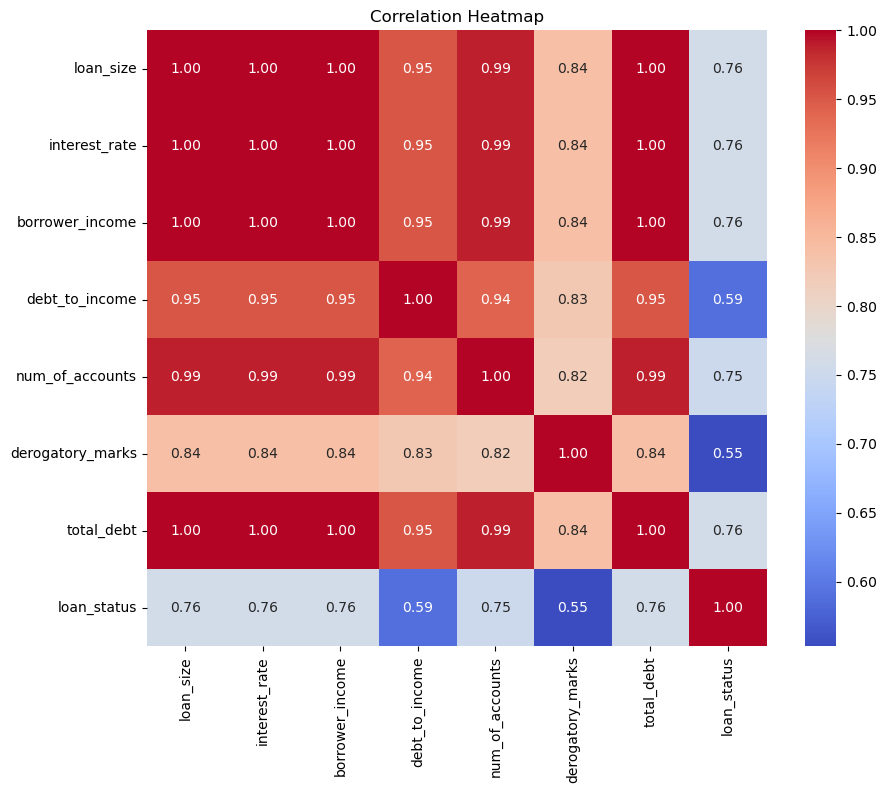

C:\Users\danyi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


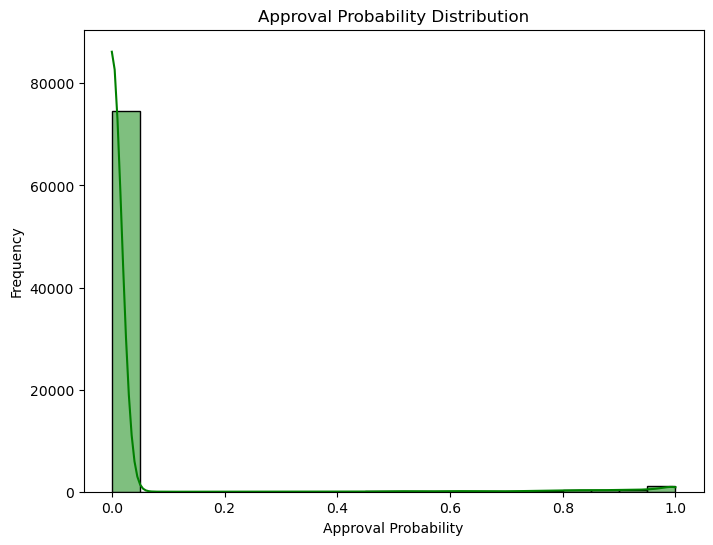

C:\Users\danyi\AppData\Local\Temp\ipykernel_33656\2804982311.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


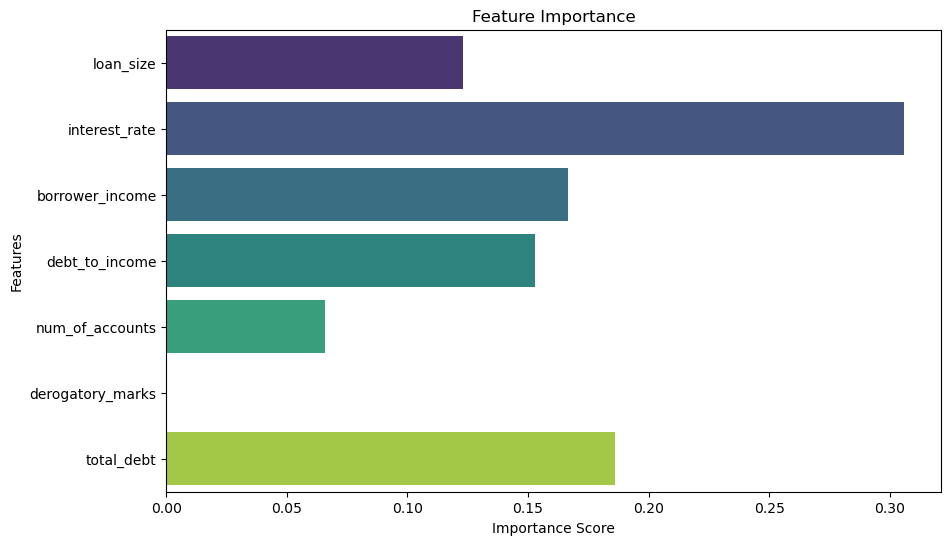

C:\Users\danyi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [42]:

# Feature Distribution
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Approval Probability Distribution (using model)
from joblib import load

# Load the model
model = load("random_forest_model.pkl")

# Features for prediction
features = df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 
               'num_of_accounts', 'derogatory_marks', 'total_debt']]

# Predict probabilities
approval_prob = model.predict_proba(features)[:, 1]

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.histplot(approval_prob, bins=20, kde=True, color='green')
plt.title('Approval Probability Distribution')
plt.xlabel('Approval Probability')
plt.ylabel('Frequency')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = features.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Prediction Outcome Distribution
predictions = model.predict(features)
outcome_counts = pd.Series(predictions).value_counts()




## Feature Importance

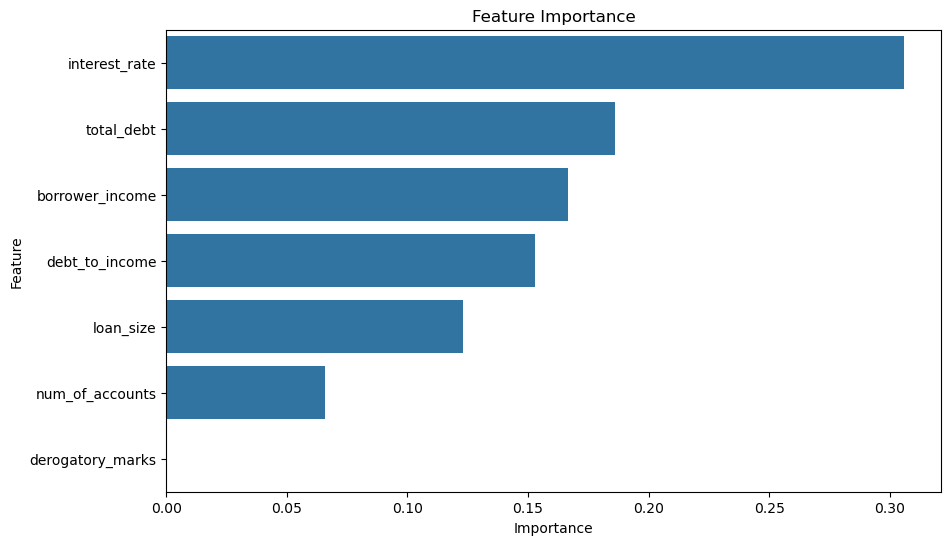

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## distribution of each feature in the dataset

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')


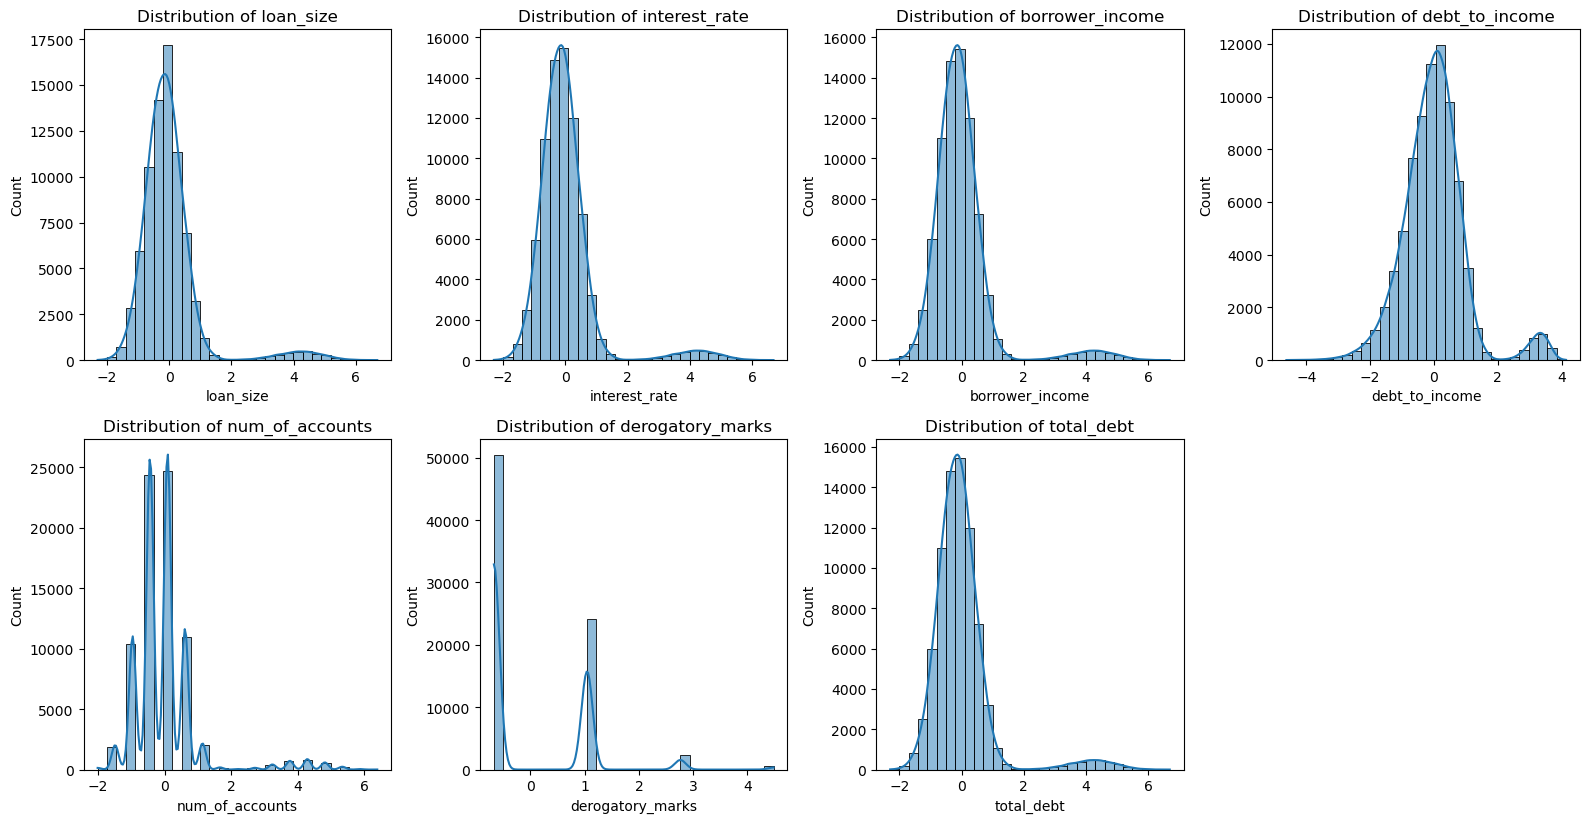

In [48]:
# Check the actual columns in the dataset
print(df.columns)

# Update the features list based on actual column names
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 
            'num_of_accounts', 'derogatory_marks', 'total_debt']  # Adjust if needed

# Plot distribution of each feature in the dataset
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
